# DTSC670: Foundations of Machine Learning Models

## Assignment 3: Multiple Linear Regression

#### Name: Annie Cushing

### CodeGrade
Please note that this assignment will be manually graded.  **You will have one attempt at submitting this assignment.**

Since we are merely using CodeGrade for this assignment as a platform to manually grade assignments, CodeGrade will not  execute your code for this assignment. Rather, it simply renders your Jupyter Notebook in the web browser. Therefore, any code blocks that generate output must be fully executed within the notebook prior to submission. Otherwise, we will not see the output of your code!

### Details
The purpose of this assignment is to hone your matplotlib skills, and expose you to an elementary multiple linear regression problem. 

The provided data has been generated from a simple linear model, but some random noise has been added. Your goal is to perform multivariate ordinary least squares linear regression to determine the Best Linear Unbiased Estimators (BLUE) for the model (that is, you must calculate the model parameters for a linear regression model).  There will be some irreducible error due to the noise that was injected into the data, therefore we will never be able to exactly recover the "true model parameters".  However, the optimal model parameters computed via the linear regression analysis are sufficiently accurate that you will be able to infer the true model parameters for yourslef!

Here are the steps you will take:

1. Create the following figure using matplotlib, which plots the data from the file called `MultipleLinearRegressionData.csv`.
2. Perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="LinearDataPlot.png" width ="800" />

Below is the second figure you must emulate:

<img src="LinearDataPlot_Curve.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `MultipleLinearRegression.csv`.

In [2]:
import pandas as pd

fileName = "MultipleLinearRegression.csv"

mlp = pd.read_csv(fileName)

mlp.head(10)

,x,y,z
0,8.340440,9.588740,209.008524
1,14.406490,13.648816,325.449818
2,0.002287,0.590582,1.651778
3,6.046651,6.393511,141.464904
4,2.935118,4.302151,83.204506
5,1.846772,2.520488,47.516465
6,3.725204,2.433642,58.323253
7,6.911215,6.062971,143.970760
8,7.935349,7.768750,178.010500
9,10.776335,11.693531,264.213292


# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

In [3]:
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

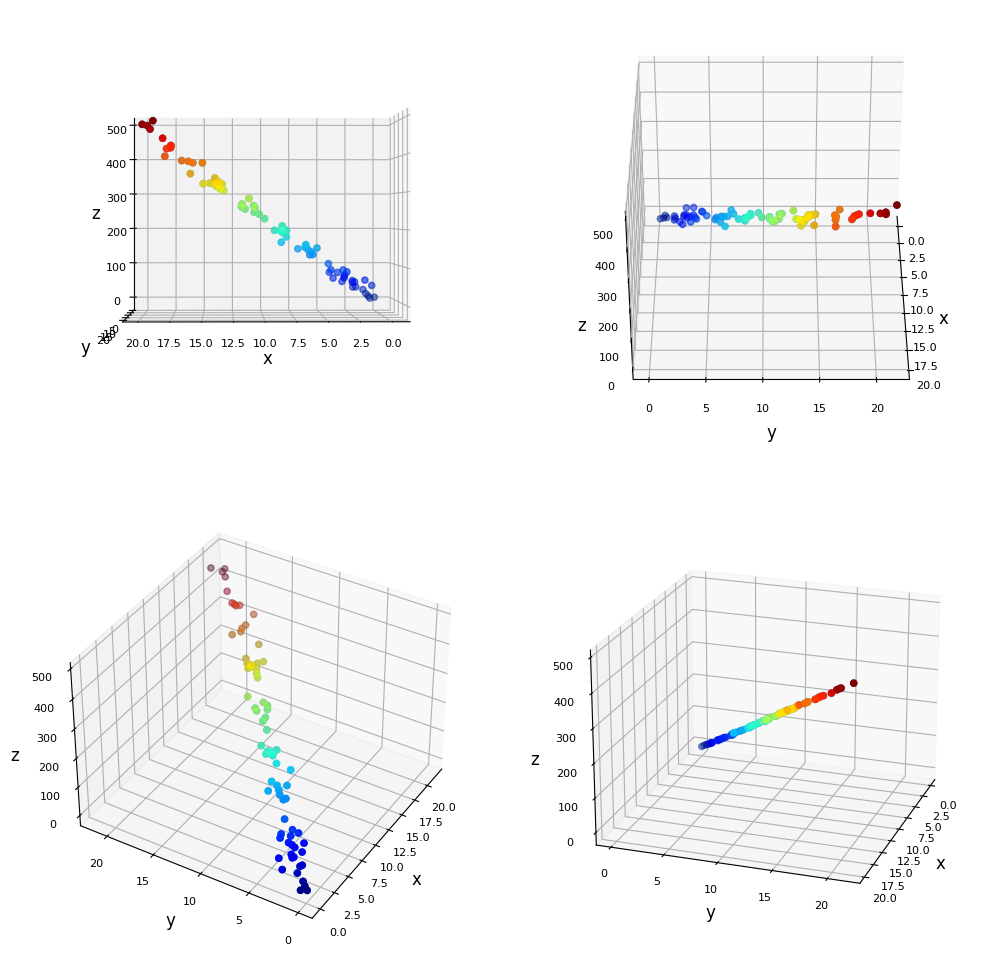

In [4]:
fig = plt.figure(figsize=(12, 12))

# fig = plt.figure(figsize=(20, 20))

# %matplotlib notebook
# %matplotlib ipympl

# I couldn't get the 'new' methods to work
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')


# Data for three-dimensional scattered points
xdata = mlp.x
ydata = mlp.y
zdata = mlp.z


# Set custom tick locations and labels for the x, y, and z axes
x_ticks = np.arange(0, 25, 2.5)  # Start at 0, end at 100, increment by 10
y_ticks = np.arange(0, 25, 5)    # Start at 0, end at 20, increment by 5
z_ticks = np.arange(0, 600, 100) # Start at 0, end at 500, increment by 100


# Store axes in a list
axes = [ax1, ax2, ax3, ax4]


# Loop through axes and apply ticks and axis labels
for ax in axes:
    ax.scatter(xdata, ydata, zdata)
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    ax.set_zticks(z_ticks)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.tick_params(axis='x', labelsize=8)  # Adjust fontsize as needed for the x-axis tick labels
    ax.tick_params(axis='y', labelsize=8)  # Adjust fontsize as needed for the y-axis tick labels
    ax.tick_params(axis='z', labelsize=8)  # Adjust fontsize as needed for the z-axis tick labels

# ax1 chart
ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax1.view_init(azim=89, elev=0)


# ax2 chart
ax2.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax2.view_init(azim=0, elev=36)


# ax3 chart
ax3.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax3.view_init(azim=149, elev=-143)
ax3.invert_yaxis()
ax3.invert_zaxis()


# ax4 chart
ax4.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax4.view_init(azim=19, elev=21)

plt.show()

# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. The `x` and `y` coordinates will be your features and `z` will be your response. 

Print the optimal model parameters to the screen by completing the following `print()` statements.

**Note:** Since we are not concerned with generalization error in this assignment, we will not split our data into training and test sets. In 'real-world' projects, you would want to split your data to see how your model performs with data that it has never seen before.

In [5]:
from sklearn.linear_model import LinearRegression

# Identify features & response data
# features = zip(xdata, ydata)  # Combine x and y as features
# response = zdata  # Response variable

features = mlp[['x', 'y']]  # Combine x and y as features
response = mlp['z'] # Response variable

# Create model object 
model = LinearRegression()

# Fit the model
model.fit(features, response)

LinearRegression()

In [6]:
coef = model.coef_
intcpt = model.intercept_

In [7]:
print("Model Coefficients: ", coef)
print("Model Intercept : ", intcpt)

Model Coefficients:  [ 8.02602396 15.95639323]
Model Intercept :  -8.632876775060708


Recreate the first image, but plot the line of best fit in each of the subplots as well.

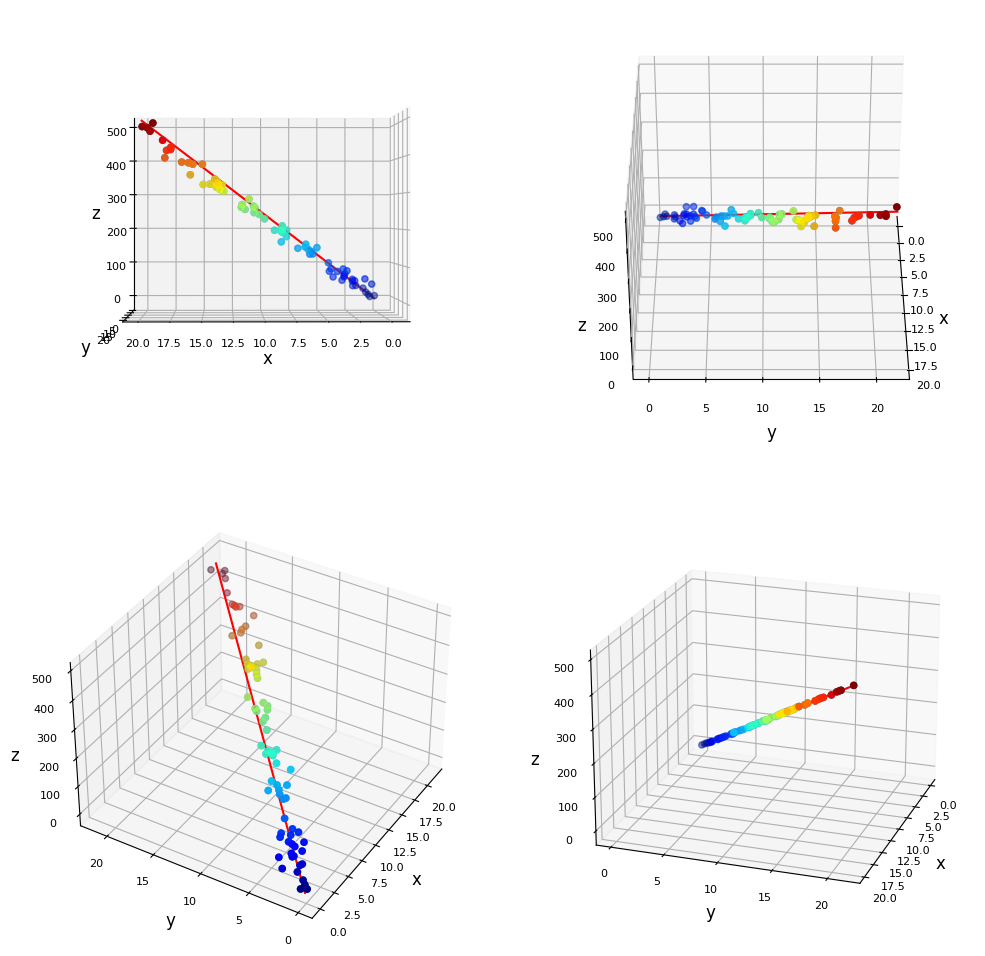

In [8]:
fig = plt.figure(figsize=(12, 12))

# fig = plt.figure(figsize=(20, 20))

# %matplotlib notebook
# %matplotlib ipympl

# I couldn't get the 'new' methods to work
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')


# Data for three-dimensional scattered points
# mlp  = mlp.sort_values('z')

xdata = mlp.x
ydata = mlp.y
zdata = mlp.z

# Define a range for plotting the regression line
x1_range = np.linspace(xdata.min(), xdata.max(), 100)
x2_range = np.linspace(ydata.min(), ydata.max(), 100)

# Create points for the regression line in the original space
X_line = np.column_stack((x1_range, x2_range))
y_line = intcpt + coef[0] * X_line[:, 0] + coef[1] * X_line[:, 1]




# Set custom tick locations and labels for the x, y, and z axes
x_ticks = np.arange(0, 25, 2.5)  # Start at 0, end at 100, increment by 10
y_ticks = np.arange(0, 25, 5)    # Start at 0, end at 20, increment by 5
z_ticks = np.arange(0, 600, 100) # Start at 0, end at 500, increment by 100


# Store axes in a list
axes = [ax1, ax2, ax3, ax4]


# Loop through axes and apply ticks and axis labels
for ax in axes:
    ax.scatter(xdata, ydata, zdata)
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    ax.set_zticks(z_ticks)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.tick_params(axis='x', labelsize=8)  # Adjust fontsize as needed for the x-axis tick labels
    ax.tick_params(axis='y', labelsize=8)  # Adjust fontsize as needed for the y-axis tick labels
    ax.tick_params(axis='z', labelsize=8)  # Adjust fontsize as needed for the z-axis tick labels

# ax1 chart
ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax1.view_init(azim=89, elev=0)
# Plot the regression line
ax1.plot(x1_range, x2_range, y_line, color='red', label='Regression Line')

# ax2 chart
ax2.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax2.view_init(azim=0, elev=36)
ax2.plot(x1_range, x2_range, y_line, color='red', label='Regression Line')

# ax3 chart
ax3.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax3.plot(x1_range, x2_range, y_line, color='red', label='Regression Line')
ax3.view_init(azim=149, elev=-143)
ax3.invert_yaxis()
ax3.invert_zaxis()


# ax4 chart
ax4.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')
ax4.plot(x1_range, x2_range, y_line, color='red', label='Regression Line')
ax4.view_init(azim=19, elev=21)


plt.show()

# Infer the True Model Parameters

I defined the equation of a line plus a random Gaussian noise term in order to generate this data - this is the "true" model (minus the noise term). You took that noisy data and performed a regression analysis to obtain estimates of the "true" model parameters. The noise in the data prevents you from computing those "true" model parameters exactly - there is some irreducible error. Instead, the linear regression model only gives you the Best Linear Unbiased Estimators (BLUE) for the "true" model parameters. 

The true model parameters that I selected are <b>integer values</b>. Given this information, you are able to infer the true model parameters by rounding the coefficients and the intercept to the nearest integer value. You may "hard-code" these values into the below print statements.

In [9]:
print("True Model Coefficients: ", coef)
print("True Model Intercept : ", intcpt)

True Model Coefficients:  [ 8.02602396 15.95639323]
True Model Intercept :  -8.632876775060708
